# EDA - Heatmaps
In this notebook heatmaps will be plot:
- **Input*: RMSLE data, calculated by building and date (one dataset per meter)
- Leaked data is excluded
- Building ID in `y` axis
- Date in `x` axis
- Grouped by site id

In [1]:
import sys
sys.path.append("..\\source\\")
import utils as utils

# Data and numbers
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

# Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
path_leak = "..\\data\\leaked\\"
path_meta = "..\\data\\original\\metadata\\"
path_data = "..\\data\\processed\\summary\\"
path_fig = "..\\figures\\"

# Leaked data

In [25]:
# Create leaked dataset by meter
"""# Load data
leak = pd.read_feather(path_leak + "leak.feather")
# Filter desired columns
leak = leak[["building_id","meter"]]

# Split by meter
leak_electricity = leak[leak.meter == 0].drop("meter",axis=1)
leak_chilledwater = leak[leak.meter == 1].drop("meter",axis=1)
leak_steam = leak[leak.meter == 2].drop("meter",axis=1)
leak_hotwater = leak[leak.meter == 3].drop("meter",axis=1)
del(leak)

# Get only list og buildings
leak_electricity = pd.DataFrame({"building_id":leak_electricity.building_id.unique()})
leak_chilledwater = pd.DataFrame({"building_id":leak_chilledwater.building_id.unique()})
leak_steam = pd.DataFrame({"building_id":leak_steam.building_id.unique()})
leak_hotwater = pd.DataFrame({"building_id":leak_hotwater.building_id.unique()})

# Save data
leak_electricity.to_csv(path_leak + "leak_electricity.csv", index=False)
leak_chilledwater.to_csv(path_leak + "leak_chilledwater.csv", index=False)
leak_steam.to_csv(path_leak + "leak_steam.csv", index=False)
leak_hotwater.to_csv(path_leak + "leak_hotwater.csv", index=False)"""

In [3]:
# Load data
leak_electricity = pd.read_csv(path_leak + "leak_electricity.csv")
leak_chilledwater = pd.read_csv(path_leak + "leak_electricity.csv")
leak_steam = pd.read_csv(path_leak + "leak_steam.csv")
leak_hotwater = pd.read_csv(path_leak + "leak_hotwater.csv")

## Metadata files

In [4]:
# Buildings metadata
meta_bdg = pd.read_csv(path_meta + "building_metadata.csv")
meta_bdg = utils.reduce_mem_usage(meta_bdg)
# Submission metadata
meta_sub = pd.read_pickle(path_meta + "df_submissions.pickle")
meta_sub = meta_sub[["submissionID","rank"]]
meta_sub.submissionID = pd.to_numeric(meta_sub.submissionID) # ID to numeric
meta_sub = utils.reduce_mem_usage(meta_sub)

Mem. usage decreased to  0.03 Mb (60.3% reduction)
Mem. usage decreased to  0.23 Mb (50.0% reduction)


## Electricity meter

In [5]:
meter = "electricity"
leak = eval(f"leak_{meter}")

# Load data
df = pd.read_pickle(path_data + f"date_vs_bdg\\{meter}_RMSLE.pickle.gz")
# Remove leaked buidings
df = df[df.building_id.isin(leak.building_id) == False]
# Datetime object
df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%d %H:%M:%S")
# Complete missing dates
df = utils.completeData(df,"2017-01-01","2018-12-31")
# Merge with metadata
df = pd.merge(df, meta_bdg, how="left", on="building_id")
# Scale metric between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_rmsle = scaler.fit_transform(np.array(df.rmsle).reshape(-1, 1))
# Add to df
df["rmsle_scaled"] = scaled_rmsle
print(f"Min rmsle: {df.rmsle.min()}. Max rmsle: {df.rmsle.max()}")
print(f"Min rmsle_scaled: {df.rmsle_scaled.min()}. Max rmsle_scaled: {df.rmsle_scaled.max()}")

Min rmsle: 0.03999936208128929. Max rmsle: 8.138672828674316
Min rmsle_scaled: 0.0. Max rmsle_scaled: 1.0


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
15


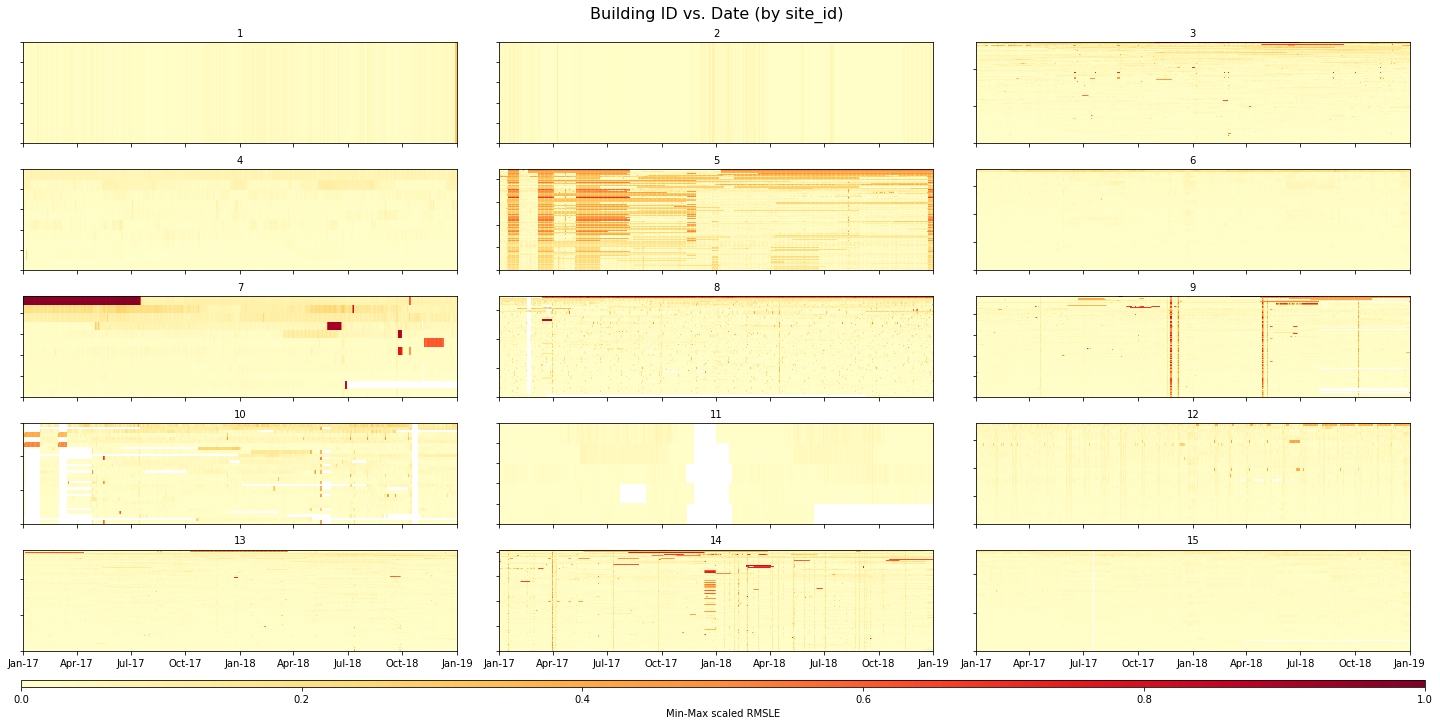

In [14]:
fig = utils.plotHeatmap("site_id",df,3)
fig.savefig(path_fig + "electricity_bdg_date_site.png", bbox_inches='tight', dpi=200)

In [18]:
"""fig = plotHeatmap("primary_use",df,4)
fig.savefig(path_fig + "electricity_bdg_date_primaryuse.png", bbox_inches='tight', dpi=200)"""

'fig = plotHeatmap("primary_use",df,4)\nfig.savefig(path_fig + "electricity_bdg_date_primaryuse.png", bbox_inches=\'tight\', dpi=200)'

# Chilledwater meter

In [6]:
meter = "chilledwater"
leak = eval(f"leak_{meter}")

# Load data
df = pd.read_pickle(path_data + f"date_vs_bdg\\{meter}_RMSLE.pickle.gz")
# Remove leaked buidings
df = df[df.building_id.isin(leak.building_id) == False]
# Datetime object
df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%d %H:%M:%S")
# Complete missing dates
df = utils.completeData(df,"2017-01-01","2018-12-31")
# Merge with metadata
df = pd.merge(df, meta_bdg, how="left", on="building_id")
# Scale metric between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_rmsle = scaler.fit_transform(np.array(df.rmsle).reshape(-1, 1))
# Add to df
df["rmsle_scaled"] = scaled_rmsle
print(f"Min rmsle: {df.rmsle.min()}. Max rmsle: {df.rmsle.max()}")
print(f"Min rmsle_scaled: {df.rmsle_scaled.min()}. Max rmsle_scaled: {df.rmsle_scaled.max()}")

Min rmsle: 0.03130454570055008. Max rmsle: 8.397016525268555
Min rmsle_scaled: 0.0. Max rmsle_scaled: 1.0


[2, 6, 7, 9, 10, 11, 13, 14, 15]
9


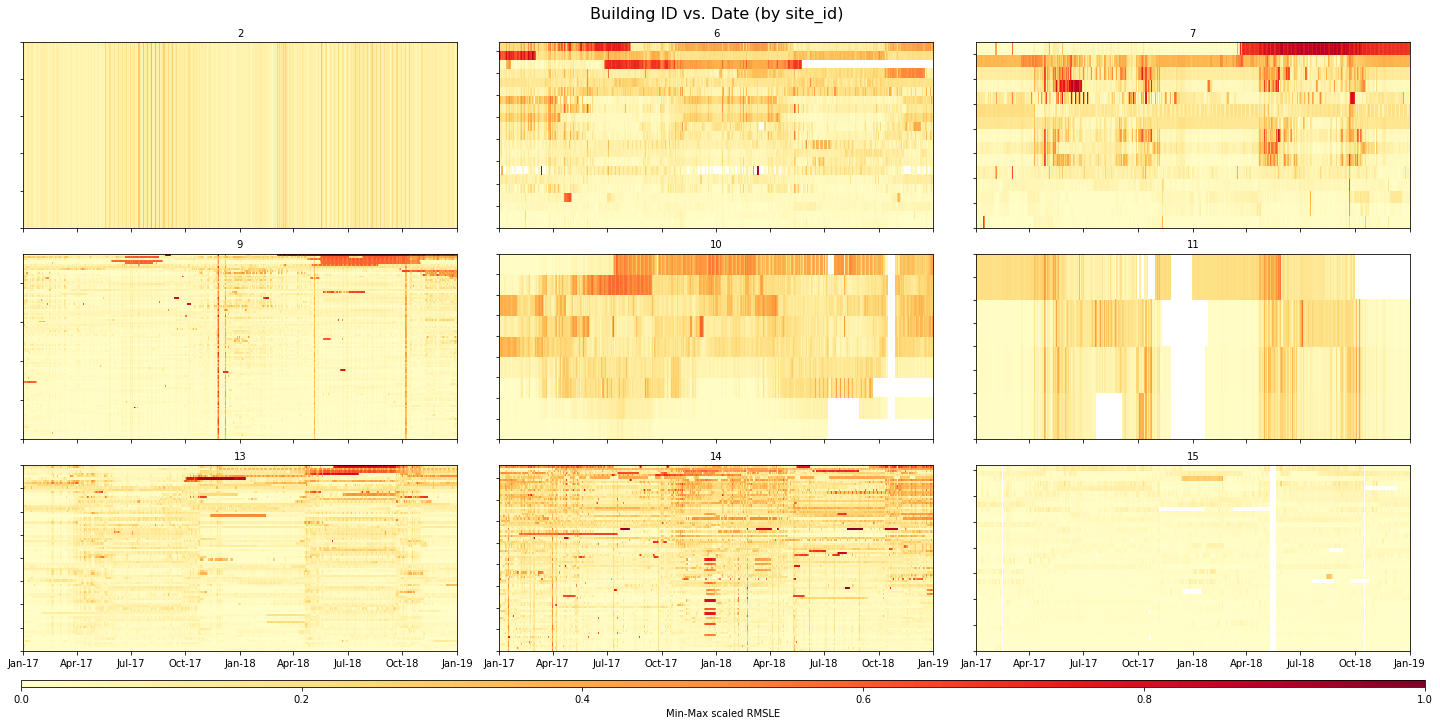

In [20]:
fig = plotHeatmap("site_id",df,3)
fig.savefig(path_fig + "chilledwater_bdg_date_site.png",bbox_inches='tight', dpi=200)

In [27]:
"""fig = plotHeatmap("primary_use",df,2)
fig.savefig(path_fig + "chilledwater_bdg_date_primaryuse.png",bbox_inches='tight', dpi=200)"""

'fig = plotHeatmap("primary_use",df,2)\nfig.savefig(path_fig + "chilledwater_bdg_date_primaryuse.png",bbox_inches=\'tight\', dpi=200)'

# Hotwater meter

In [7]:
meter = "hotwater"
leak = eval(f"leak_{meter}")

# Load data
df = pd.read_pickle(path_data + f"date_vs_bdg\\{meter}_RMSLE.pickle.gz")
# Remove leaked buidings
df = df[df.building_id.isin(leak.building_id) == False]
# Datetime object
df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%d %H:%M:%S")
# Complete missing dates
df = utils.completeData(df,"2017-01-01","2018-12-31")
# Merge with metadata
df = pd.merge(df, meta_bdg, how="left", on="building_id")
# Scale metric between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_rmsle = scaler.fit_transform(np.array(df.rmsle).reshape(-1, 1))
# Add to df
df["rmsle_scaled"] = scaled_rmsle
print(f"Min rmsle: {df.rmsle.min()}. Max rmsle: {df.rmsle.max()}")
print(f"Min rmsle_scaled: {df.rmsle_scaled.min()}. Max rmsle_scaled: {df.rmsle_scaled.max()}")

Min rmsle: 0.11213328689336777. Max rmsle: 8.06053352355957
Min rmsle_scaled: 0.0. Max rmsle_scaled: 1.0


[1, 7, 10, 11, 14, 15]
6


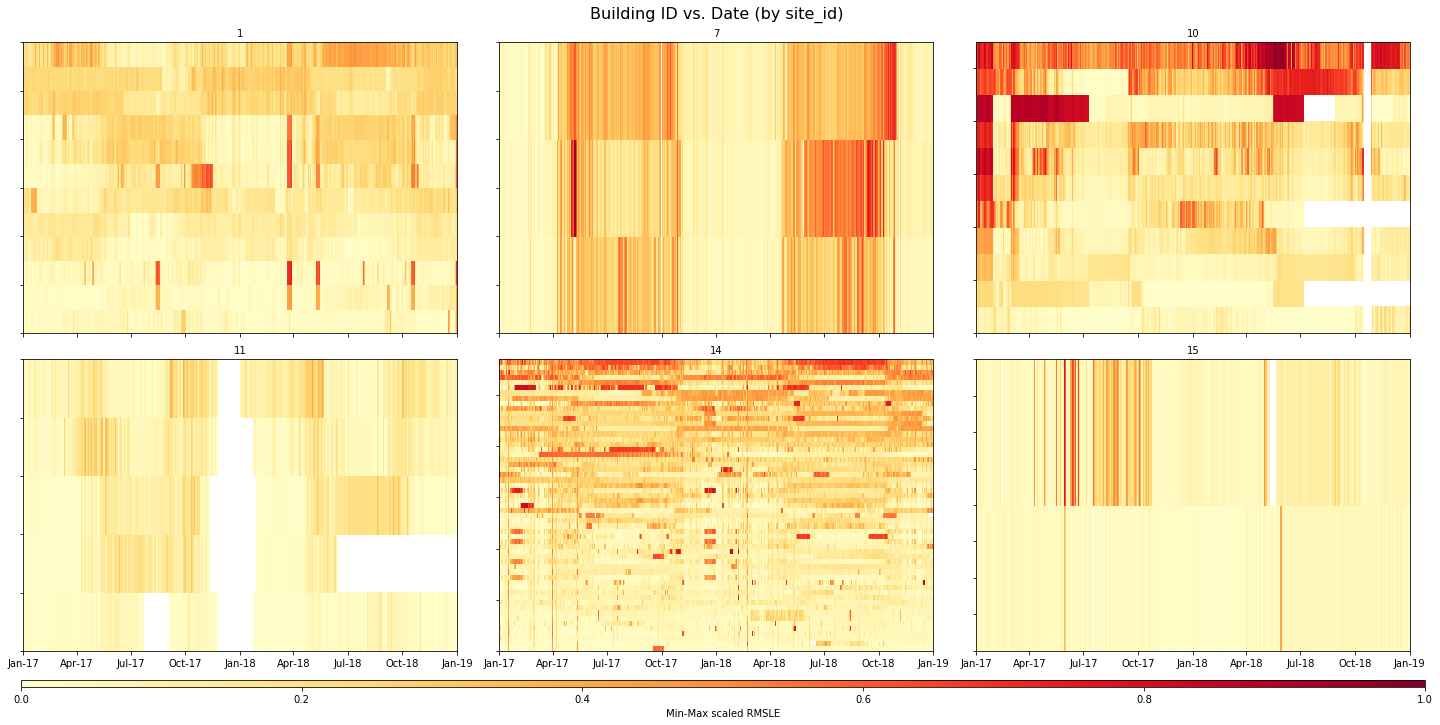

In [28]:
fig = plotHeatmap("site_id",df,3)
fig.savefig(path_fig + "hotwater_bdg_date_site.png", bbox_inches='tight', dpi=200)

In [29]:
"""fig = plotHeatmap("primary_use",df,2)
fig.savefig(path_fig + "hotwater_bdg_date_primaryuse.png", bbox_inches='tight', dpi=200)"""

'fig = plotHeatmap("primary_use",df,2)\nfig.savefig(path_fig + "hotwater_bdg_date_primaryuse.png", bbox_inches=\'tight\', dpi=200)'

# Steam meter

In [8]:
meter = "steam"
leak = eval(f"leak_{meter}")

# Load data
df = pd.read_pickle(path_data + f"date_vs_bdg\\{meter}_RMSLE.pickle.gz")
# Remove leaked buidings
df = df[df.building_id.isin(leak.building_id) == False]
# Datetime object
df.timestamp = pd.to_datetime(df.timestamp, format="%Y-%m-%d %H:%M:%S")
# Complete missing dates
df = utils.completeData(df,"2017-01-01","2018-12-31")
# Merge with metadata
df = pd.merge(df, meta_bdg, how="left", on="building_id")
# Scale metric between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))
scaled_rmsle = scaler.fit_transform(np.array(df.rmsle).reshape(-1, 1))
# Add to df
df["rmsle_scaled"] = scaled_rmsle
print(f"Min rmsle: {df.rmsle.min()}. Max rmsle: {df.rmsle.max()}")
print(f"Min rmsle_scaled: {df.rmsle_scaled.min()}. Max rmsle_scaled: {df.rmsle_scaled.max()}")

Min rmsle: 0.0737953633069992. Max rmsle: 9.318635940551758
Min rmsle_scaled: 0.0. Max rmsle_scaled: 1.0


[6, 7, 9, 13, 14, 15]
6


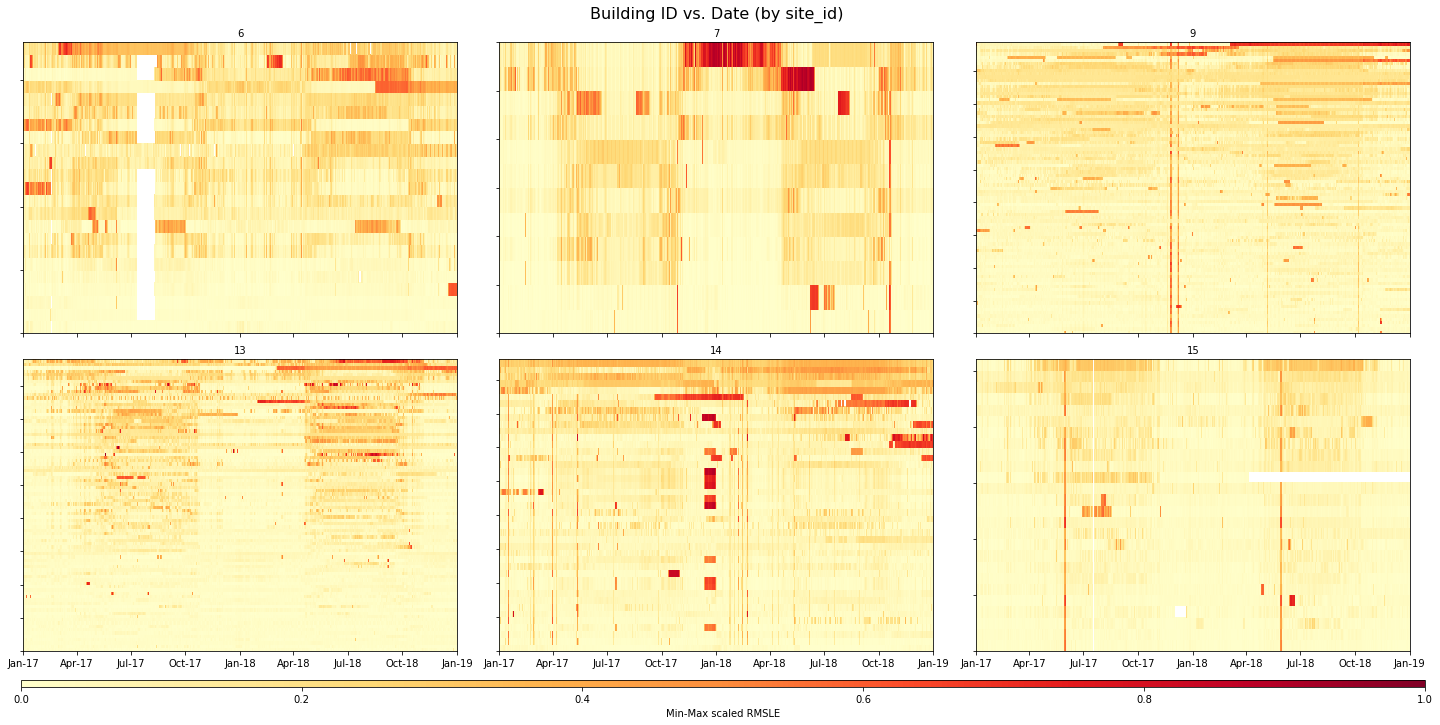

In [37]:
fig = plotHeatmap("site_id",df,3)
fig.savefig(path_fig + "steam_bdg_date_site.png", bbox_inches='tight', dpi=200)

In [36]:
"""fig = plotHeatmap("primary_use",df,2)
fig.savefig(path_fig + "steam_bdg_date_primaryuse.png", bbox_inches='tight',dpi=200)"""

'fig = plotHeatmap("primary_use",df,2)\nfig.savefig(path_fig + "steam_bdg_date_primaryuse.png", bbox_inches=\'tight\',dpi=200)'